# SPAM SMS DETECTION
The aim of this task is to build an AI model that can classify SMS messages as spam or legitimate

# Importing the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, roc_auc_score,recall_score, roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading, describing and filtering data

In [2]:
# Loading data into jupyter encoding, and column names explicitly, skipping the default header row
sms_text = pd.read_csv(r"C:\Users\HP\Downloads\spam.csv", encoding='latin1', names=["Labels", "Message", "extra_col1", "extra_col2", "extra_col3"], header=0)
sms_text.head() # displays top 5 rows

,Labels,Message,extra_col1,extra_col2,extra_col3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms_text.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Labels      5572 non-null   object
 1   Message     5572 non-null   object
 2   extra_col1  50 non-null     object
 3   extra_col2  12 non-null     object
 4   extra_col3  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
sms_text.describe(include="object")

,Labels,Message,extra_col1,extra_col2,extra_col3
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
sms_text.isnull().sum() # Counts the number of missing values in each column

Labels           0
Message          0
extra_col1    5522
extra_col2    5560
extra_col3    5566
dtype: int64

In [6]:
# Combines additional columns with the 'Message' column by concatenating their content and
# Drops any NaN values and converts all data to string before joining with a space
sms_text["Message"] = sms_text[['Message', 'extra_col1', 'extra_col2', 'extra_col3']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drops the redundant extra columns
sms_text.drop(columns=["extra_col1", "extra_col2", "extra_col3"], inplace=True)


In [7]:
sms_text.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
sms_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Labels   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
sms_text.describe(include="object") # Displays descriptive statistics for categorical columns 

,Labels,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
sms_text["Labels"].unique() 

array(['ham', 'spam'], dtype=object)

In [11]:
# Converts 'ham' to 0 and 'spam' to 1
sms_text["Labels"] = sms_text.Labels.map({"ham":0,"spam":1})

In [12]:
# number of messages that are hams and spams
ham_message = sms_text[sms_text.Labels == 0].shape[0]
spam_message = sms_text[sms_text.Labels == 1].shape[0]

# percentage of ham messages
percent_ham = ham_message/(ham_message+spam_message)*100
print(f"{percent_ham:.2f} percent of the messages are ham")
# percentage of spam messages
percent_spam = spam_message/(ham_message+spam_message)*100
print(f"{percent_spam:.2f} percent of the messages are spam")

86.59 percent of the messages are ham
13.41 percent of the messages are spam


In [13]:
sms_text.head()
sms_text.to_csv("sms_text.csv",index=False)

# Data splitting

In [14]:
# Splits the dataset into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(sms_text["Message"],sms_text["Labels"],random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4179,), (1393,), (4179,), (1393,))

# Data Transformation

In [15]:
# Creates an instance of the CountVectorizer
count_vector = CountVectorizer()
type(count_vector)

sklearn.feature_extraction.text.CountVectorizer

In [16]:
# Transforms the training data into a matrix of token counts
train = count_vector.fit_transform(X_train)
# Converts the sparse matrix to a dense array
train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# Transforms the test data into a matrix of token counts
test = count_vector.transform(X_test)
# Converts the sparse matrix to a dense array
test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Model training

In [18]:
# Creates an instance of the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
# Trains the Naive Bayes model on the token counts of the training data and the corresponding labels
naive_bayes.fit(train,y_train)

MultinomialNB()

In [19]:
# Using the trained Naive Bayes model to make predictions on the test data
predictions = naive_bayes.predict(test)
print(predictions)

[0 0 0 ... 0 0 0]


# Model evaluation

In [20]:
predlist = list(zip(predictions,y_test))
predlist.head()

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 

In [21]:
# Prints the classification report to evaluate the performance of the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.93      0.94       180

    accuracy                           0.98      1393
   macro avg       0.97      0.96      0.97      1393
weighted avg       0.98      0.98      0.98      1393



In [22]:
# Calculates precision, recall, F1 score, ROC AUC,and PR AUC
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
precision_vals, recall_vals, _ = precision_recall_curve(y_test,predictions)
pr_auc = auc(recall_vals, precision_vals)
print("Accuracy score:",accuracy_score(y_test,predictions))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")

Accuracy score: 0.9849246231155779
Precision: 0.95
Recall: 0.93
F1 Score: 0.94
ROC AUC: 0.96
PR AUC: 0.95


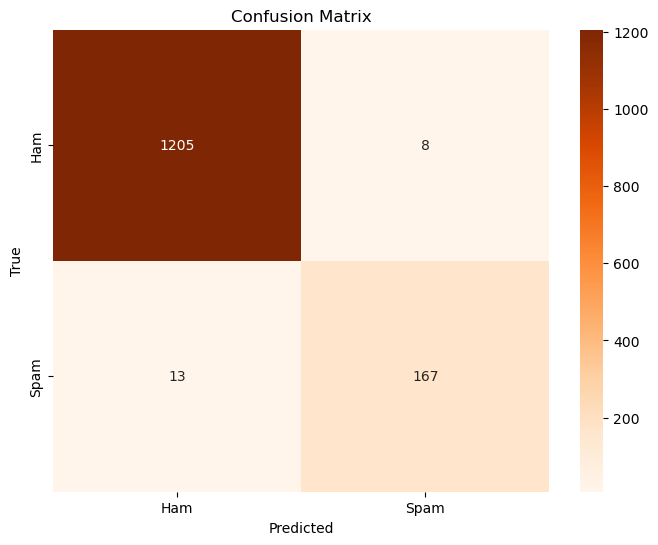

In [23]:
conf_matrix =confusion_matrix(y_test,predictions)
# Creates a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

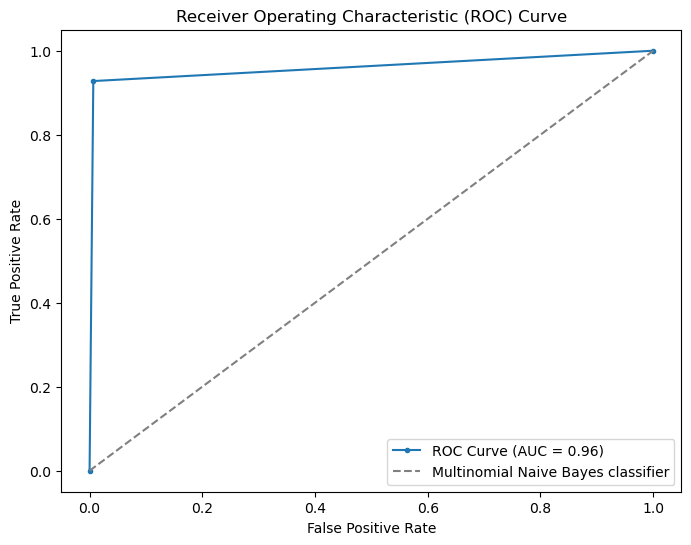

In [24]:
# Plots the ROC curve
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--',color='grey', label='Multinomial Naive Bayes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
X_test

1078                             Convey my regards to him
4028             [Û_] anyway, many good evenings to u! s
958     My sort code is  and acc no is . The bank is n...
4642                          Sorry i din lock my keypad.
4674    Hi babe its Chloe, how r u? I was smashed on s...
                              ...                        
3207    Oops my phone died and I didn't even know. Yea...
4655                           K, I'll work something out
1140            Oh:)as usual vijay film or its different?
1793              You bad girl. I can still remember them
1710    (No promises on when though, haven't even gott...
Name: Message, Length: 1393, dtype: object

In [26]:
# Predicting a specific test instance
predictions_trial = naive_bayes.predict(test[1078])
print(predictions_trial[0])

0


In [27]:
# Checks predicted label and prints a message indicating whether the message is classified as 'ham' or 'spam'
print(predictions[0])
if (predictions[0]==0):
    print("Message is ham")
else:
    print('Message is spam')

0
Message is ham


In [28]:
# Takes input from the user for an SMS message
sms_input = input("Enter the sms messsage: ")
# Transforms the input SMS message using CountVectorizer 
predict_sms = naive_bayes.predict(count_vector.transform([sms_input]))
# Checks and prints if the predicted label is 0 (ham) or 1 (spam)
if predict_sms[0] == 0 :
    print("Message is ham")
else:
    print("Message is spam")

Enter the sms messsage:   nice job
Message is ham


## Created a streamlit app to predict if input sms is ham or spam
### [Spam Detector](https://blank-app-ngbvl7fzyb.streamlit.app/)